<a href="https://colab.research.google.com/github/shivagowri1928/Deep_Learning/blob/main/image_classification(vit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install datasets transformers

In [2]:
from datasets import load_dataset

ds = load_dataset('Matthijs/snacks')

Reusing dataset snacks (/root/.cache/huggingface/datasets/Matthijs___snacks/default/0.0.1/c0ce49075aa469a098a5f2e3455941c894e02e1c9bf642d4d33e6c51460ff590)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
eg = ds['train'][40]
eg

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=341x256 at 0x7FE26A01CE50>,
 'label': 7}

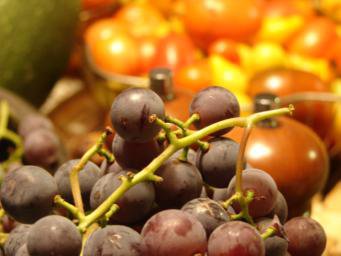

In [4]:
image = eg['image']
image

In [5]:
label = ds['train'].features['label']
label

ClassLabel(num_classes=20, names=['apple', 'banana', 'cake', 'candy', 'carrot', 'cookie', 'doughnut', 'grape', 'hot dog', 'ice cream', 'juice', 'muffin', 'orange', 'pineapple', 'popcorn', 'pretzel', 'salad', 'strawberry', 'waffle', 'watermelon'], id=None)

In [6]:
print('No of images in Train dataset ', len(ds['train']))
print('No of images in Test dataset ', len(ds['test']))
print('No of images in Validation dataset ', len(ds['validation']))


No of images in Train dataset  4838
No of images in Test dataset  952
No of images in Validation dataset  955


In [7]:
label.int2str(eg['label'])

'grape'

In [8]:
"""
from transformers.utils.dummy_vision_objects import ImageGPTFeatureExtractor
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed:int=1234, egs_per_class: int = 2, size=(224,224)):
  w, h =size
  labels = ds['train'].features['label'].names
  grid = Image.new('RGB', size = (egs_per_class*w, len(labels) * h))
  draw = ImageDraw.Draw(grid)


  for label_id, label in enumerate(labels):
    ds_slice = ds['train'].filter(lambda eg : eg['label'] == label_id).shuffle(seed).select(range(egs_per_class))


    for i, example in enumerate(ds_slice):
      image = example['image']
      idx = egs_per_class * label_id * i
      box = (idx % egs_per_class * w, idx // egs_per_class *h)
      grid.paste(image.resize(size), box=box)
      draw.text(box, label, (255, 255, 255))

  return grid

show_examples(ds, seed=random.randint(0,1337), egs_per_class=2)

"""




"\nfrom transformers.utils.dummy_vision_objects import ImageGPTFeatureExtractor\nimport random\nfrom PIL import ImageDraw, ImageFont, Image\n\ndef show_examples(ds, seed:int=1234, egs_per_class: int = 2, size=(224,224)):\n  w, h =size\n  labels = ds['train'].features['label'].names\n  grid = Image.new('RGB', size = (egs_per_class*w, len(labels) * h))\n  draw = ImageDraw.Draw(grid)\n\n\n  for label_id, label in enumerate(labels):\n    ds_slice = ds['train'].filter(lambda eg : eg['label'] == label_id).shuffle(seed).select(range(egs_per_class))\n\n\n    for i, example in enumerate(ds_slice):\n      image = example['image']\n      idx = egs_per_class * label_id * i\n      box = (idx % egs_per_class * w, idx // egs_per_class *h)\n      grid.paste(image.resize(size), box=box)\n      draw.text(box, label, (255, 255, 255))\n\n  return grid\n\nshow_examples(ds, seed=random.randint(0,1337), egs_per_class=2)\n\n"

In [9]:
from transformers import ViTFeatureExtractor
model_name = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

In [10]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

In [11]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[ 0.4431,  0.4667,  0.4667,  ...,  0.9843,  0.9608,  0.9686],
          [ 0.4667,  0.4745,  0.4588,  ...,  0.9843,  0.9608,  0.9686],
          [ 0.4745,  0.4667,  0.4353,  ...,  0.9765,  0.9686,  0.9765],
          ...,
          [-0.2157, -0.4275, -0.5529,  ...,  0.7176,  0.7333,  0.7176],
          [-0.2157, -0.4118, -0.5608,  ...,  0.6314,  0.6314,  0.6000],
          [-0.1608, -0.3882, -0.5686,  ...,  0.5765,  0.5529,  0.5059]],

         [[ 0.3333,  0.3569,  0.3569,  ...,  0.5686,  0.5529,  0.5608],
          [ 0.3569,  0.3647,  0.3490,  ...,  0.5216,  0.4980,  0.5137],
          [ 0.3647,  0.3569,  0.3255,  ...,  0.4196,  0.4118,  0.4275],
          ...,
          [-0.4118, -0.6314, -0.7569,  ...,  0.2235,  0.2549,  0.2627],
          [-0.4196, -0.6235, -0.7725,  ...,  0.1216,  0.1373,  0.1216],
          [-0.3961, -0.6000, -0.7804,  ...,  0.0667,  0.0510,  0.0275]],

         [[-0.4275, -0.4039, -0.4039,  ..., -0.7961, -0.8196, -0.8275],
          [-0

In [12]:
def process_example(example):
  inputs = feature_extractor(example['image'], return_tensors='pt')
  inputs['label'] = example['label']
  return inputs

In [13]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[-0.5294, -0.7490, -0.8353,  ..., -0.7255, -0.6157, -0.6471],
          [-0.6314, -0.8431, -0.8275,  ..., -0.5529, -0.6157, -0.6471],
          [-0.7098, -0.8118, -0.6784,  ..., -0.4902, -0.6941, -0.7098],
          ...,
          [-0.8902, -0.8039, -0.7647,  ..., -0.9373, -0.8588, -0.8902],
          [-0.7882, -0.7333, -0.7176,  ..., -0.9529, -0.8824, -0.9294],
          [-0.6000, -0.6314, -0.6549,  ..., -0.9529, -0.8667, -0.9216]],

         [[ 0.2549,  0.1137,  0.1059,  ..., -0.4039, -0.3098, -0.3804],
          [ 0.1765,  0.0275,  0.0667,  ..., -0.2235, -0.3176, -0.3882],
          [ 0.1451,  0.0745,  0.1529,  ..., -0.1608, -0.3882, -0.4431],
          ...,
          [-0.2392, -0.1451, -0.0667,  ..., -0.4588, -0.3569, -0.3804],
          [-0.0980, -0.0353,  0.0196,  ..., -0.4745, -0.3804, -0.4196],
          [ 0.1059,  0.0902,  0.0902,  ..., -0.4588, -0.3569, -0.4118]],

         [[ 1.0000,  0.9765,  0.9059,  ..., -0.4745, -0.4431, -0.5373],
          [ 0

In [14]:
def transform(example_batch):
  inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

  inputs['label'] = example_batch['label']
  return inputs

prepared_ds = ds.with_transform(transform)

Parameter 'transform'=<function transform at 0x7fe19d4ff320> of the transform datasets.arrow_dataset.Dataset.set_format couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


In [15]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[-0.5294, -0.7490, -0.8353,  ..., -0.7255, -0.6157, -0.6471],
          [-0.6314, -0.8431, -0.8275,  ..., -0.5529, -0.6157, -0.6471],
          [-0.7098, -0.8118, -0.6784,  ..., -0.4902, -0.6941, -0.7098],
          ...,
          [-0.8902, -0.8039, -0.7647,  ..., -0.9373, -0.8588, -0.8902],
          [-0.7882, -0.7333, -0.7176,  ..., -0.9529, -0.8824, -0.9294],
          [-0.6000, -0.6314, -0.6549,  ..., -0.9529, -0.8667, -0.9216]],

         [[ 0.2549,  0.1137,  0.1059,  ..., -0.4039, -0.3098, -0.3804],
          [ 0.1765,  0.0275,  0.0667,  ..., -0.2235, -0.3176, -0.3882],
          [ 0.1451,  0.0745,  0.1529,  ..., -0.1608, -0.3882, -0.4431],
          ...,
          [-0.2392, -0.1451, -0.0667,  ..., -0.4588, -0.3569, -0.3804],
          [-0.0980, -0.0353,  0.0196,  ..., -0.4745, -0.3804, -0.4196],
          [ 0.1059,  0.0902,  0.0902,  ..., -0.4588, -0.3569, -0.4118]],

         [[ 1.0000,  0.9765,  0.9059,  ..., -0.4745, -0.4431, -0.5373],
          [ 0

In [16]:
import torch

def collate_fn(examples):
  pixel_values = torch.stack([example["pixel_values"] for example in examples])
  labels = torch.tensor([example["label"] for example in examples])
  return {"pixel_values": pixel_values, "labels": labels}



In [17]:
import numpy as np
from datasets import load_metric

metric = load_metric('accuracy')

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [19]:
from transformers import ViTForImageClassification

label = ds['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(model_name,
                                                  num_labels=20,
                                                  id2label={str(i): c for i,c in enumerate(label)},
                                                  label2id={c:str(i) for i,c in enumerate(label)})

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    f"vit-snacks",
    per_device_train_batch_size = 16,
    evaluation_strategy='steps',
    num_train_epochs=5,
    save_steps=100,
    eval_steps=100,
    logging_steps =10,
    learning_rate=2e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=True,
    report_to='tensorboard',
    load_best_model_at_end=True,
)

PyTorch: setting up devices


In [21]:
%%capture
! pip install huggingface_hub
! git config --global credential.helper store

In [22]:
from huggingface_hub import notebook_login

notebook_login()

In [23]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    data_collator = collate_fn,
    compute_metrics= compute_metrics,
    train_dataset = prepared_ds['train'],
    eval_dataset = prepared_ds['validation'],
    tokenizer=feature_extractor,

)

In [24]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics('train', train_results.metrics)
trainer.save_metrics('train', train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 4838
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1515


Step,Training Loss,Validation Loss,Accuracy
100,0.876400,0.960147,0.840838
200,0.654800,0.747212,0.833508
300,0.472400,0.502757,0.878534
400,0.276400,0.474296,0.880628
500,0.252900,0.447288,0.883770
600,0.117900,0.466329,0.878534
700,0.066600,0.418198,0.897382
800,0.054800,0.405432,0.902618
900,0.095600,0.349726,0.917277
1000,0.017700,0.316750,0.912042


***** Running Evaluation *****
  Num examples = 955
  Batch size = 8
Saving model checkpoint to vit-snacks/checkpoint-100
Configuration saved in vit-snacks/checkpoint-100/config.json
Model weights saved in vit-snacks/checkpoint-100/pytorch_model.bin
Feature extractor saved in vit-snacks/checkpoint-100/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 955
  Batch size = 8
Saving model checkpoint to vit-snacks/checkpoint-200
Configuration saved in vit-snacks/checkpoint-200/config.json
Model weights saved in vit-snacks/checkpoint-200/pytorch_model.bin
Feature extractor saved in vit-snacks/checkpoint-200/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 955
  Batch size = 8
Saving model checkpoint to vit-snacks/checkpoint-300
Configuration saved in vit-snacks/checkpoint-300/config.json
Model weights saved in vit-snacks/checkpoint-300/pytorch_model.bin
Feature extractor saved in vit-snacks/checkpoint-300/preprocessor_config.json
Deleting older c

***** train metrics *****
  epoch                    =          5.0
  total_flos               = 1746074896GF
  train_loss               =       0.2606
  train_runtime            =   0:19:45.83
  train_samples_per_second =       20.399
  train_steps_per_second   =        1.278


In [26]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics('eval',metrics)
trainer.save_metrics('eval', metrics)

***** Running Evaluation *****
  Num examples = 955
  Batch size = 8


***** eval metrics *****
  epoch                   =        5.0
  eval_accuracy           =      0.912
  eval_loss               =     0.3167
  eval_runtime            = 0:00:14.32
  eval_samples_per_second =     66.648
  eval_steps_per_second   =      8.375
